In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# import keras
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [155]:
df = pd.read_csv('../data/model_data/salaries_with_stats.csv')
df.head(2)

,player,nhl_api_id_number,team,cap hit %,aav,length,weight,height,drafted,slide cand.,...,shifts,shortHandedGoals,shortHandedPoints,shortHandedTimeOnIce,shotPct,shots,timeOnIce,position_F,shoots_Right,contract_is_two_way
0,Connor McDavid,8478402,EDM,16.7,12500000.0,8,193,185,1,0,...,3028.0,1.0,2.0,100.966667,27.2,356.0,2582.600000,1,0,0
1,Artemi Panarin,8478550,NYR,14.3,11642857.0,7,168,180,218,0,...,7328.0,0.0,0.0,8.766667,57.2,817.0,6277.516667,1,1,0


In [156]:
df = df.dropna(axis=0)

In [157]:
df = df[df['length'] <= 8]

In [158]:
df = df.drop([21, 670], axis=0)

In [159]:
df.index = [i for i in range(len(df.index))]

In [160]:
df.columns

Index(['player', 'nhl_api_id_number', 'team', 'cap hit %', 'aav', 'length',
       'weight', 'height', 'drafted', 'slide cand.', 'waivers exempt',
       'arb. elig', 'signing age', 'was_RFA_at_signing', 'is_RFA_at_expiry',
       'goals', 'assists', 'points', 'blocked', 'evenTimeOnIce', 'faceOffPct',
       'gameWinningGoals', 'games', 'hits', 'overTimeGoals', 'pim',
       'plusMinus', 'powerPlayGoals', 'powerPlayPoints', 'powerPlayTimeOnIce',
       'shifts', 'shortHandedGoals', 'shortHandedPoints',
       'shortHandedTimeOnIce', 'shotPct', 'shots', 'timeOnIce', 'position_F',
       'shoots_Right', 'contract_is_two_way'],
      dtype='object')

# k e r a s

In [161]:
y = df['cap hit %'].values.reshape((len(df.index),-1))

feature_cols = list(df.columns[5:])
X = df[feature_cols]

# standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [162]:
len(feature_cols)

35

In [163]:
def build_model():
    model = keras.Sequential([
    layers.Dense(35, activation=tf.nn.relu, input_shape=[len(feature_cols)]),
    layers.Dense(35, activation=tf.nn.relu),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

# build model
model = build_model()

In [164]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 35)                1260      
_________________________________________________________________
dense_46 (Dense)             (None, 35)                1260      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 36        
Total params: 2,556
Trainable params: 2,556
Non-trainable params: 0
_________________________________________________________________


In [165]:
epochs = 1000
history = model.fit(X_train, y_train,
                    epochs=epochs, 
                    validation_split = 0.2, 
                    verbose=0)

In [166]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.head(10)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,21.063370,3.425590,21.063370,17.288222,2.751238,17.288223,0
1,13.562719,2.565737,13.562719,11.731270,2.312794,11.731270,1
2,9.926403,2.164704,9.926403,8.601555,2.008552,8.601556,2
3,7.439611,1.867555,7.439611,6.460400,1.689650,6.460400,3
4,5.773039,1.581286,5.773039,4.942210,1.435208,4.942209,4
5,4.381280,1.351126,4.381280,3.863376,1.273399,3.863376,5
6,3.326495,1.160464,3.326495,3.150667,1.188177,3.150667,6
7,2.638336,1.058409,2.638336,2.584909,1.112649,2.584908,7
8,2.148931,0.966799,2.148931,2.214676,1.021256,2.214676,8
9,1.804403,0.910558,1.804403,2.087503,0.992531,2.087503,9


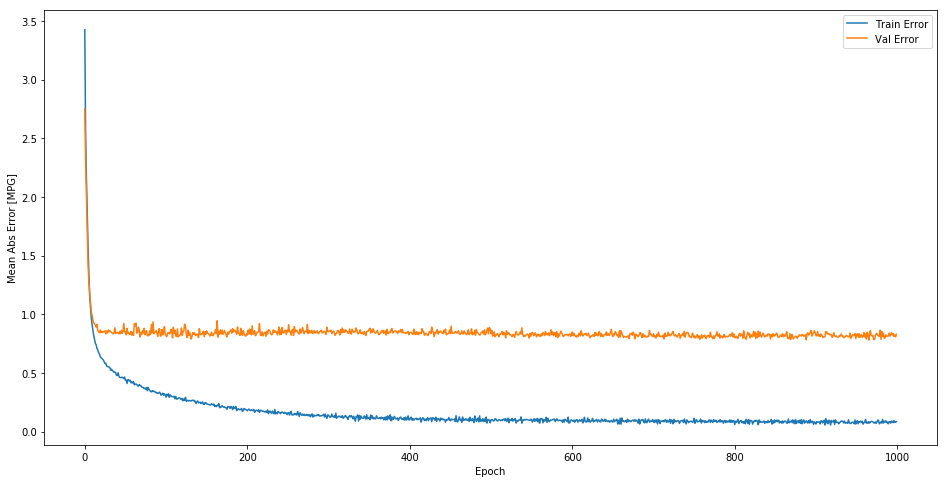

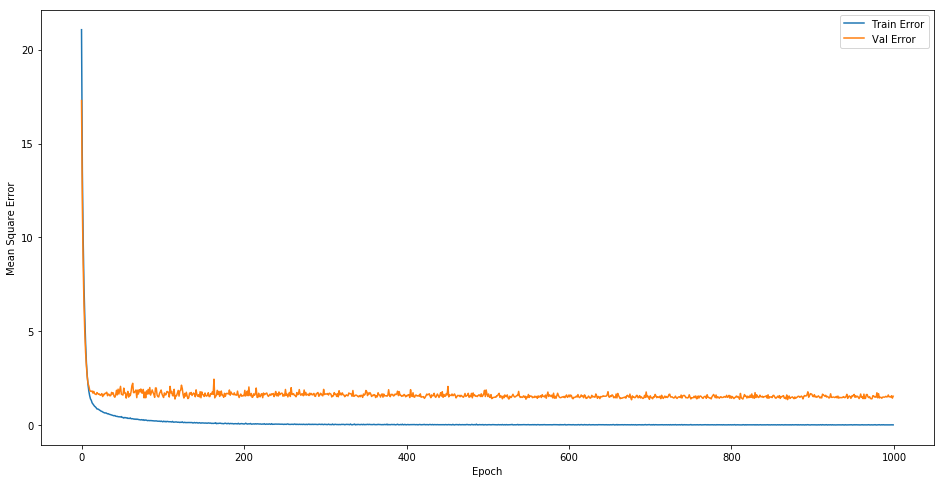

In [167]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()

    plt.figure(figsize=(16,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.show()


plot_history(history)

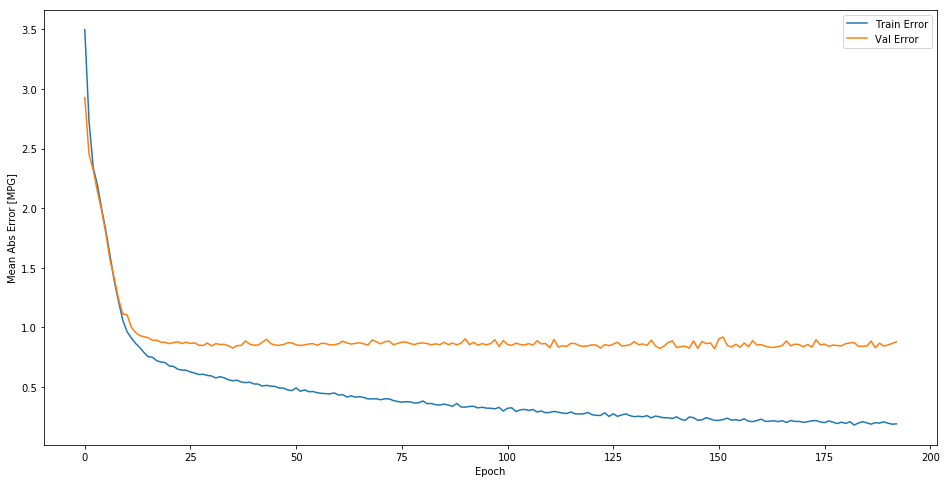

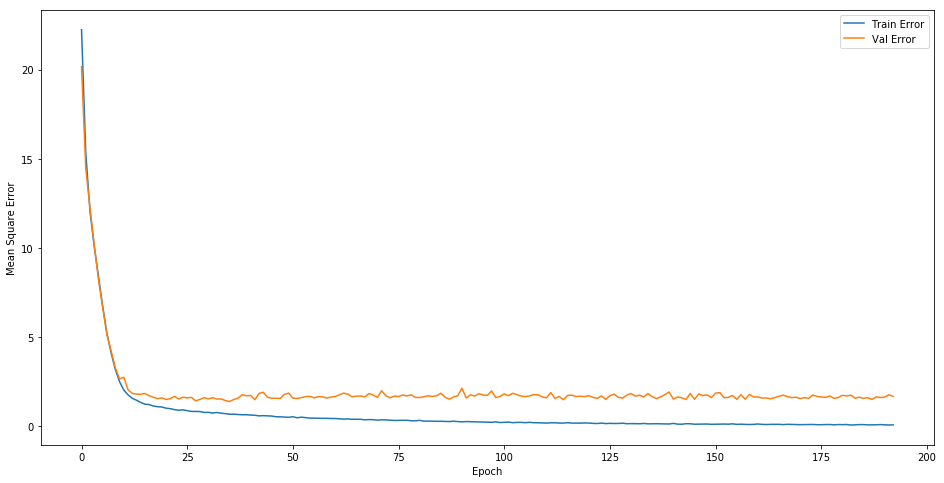

In [168]:
# instantiate new model
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10)

epochs = 1000
history = model.fit(X_train, y_train,
                    epochs=epochs, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[early_stop])

plot_history(history)

In [169]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 35)                1260      
_________________________________________________________________
dense_49 (Dense)             (None, 35)                1260      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 36        
Total params: 2,556
Trainable params: 2,556
Non-trainable params: 0
_________________________________________________________________


In [170]:
# instantiate new model
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=10)

epochs = 1000
history = model.fit(X, y,
                    epochs=epochs, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[early_stop])

df['preds'] = model.predict(X)

In [171]:
import matplotlib.pyplot as plt

In [172]:
import seaborn as sns

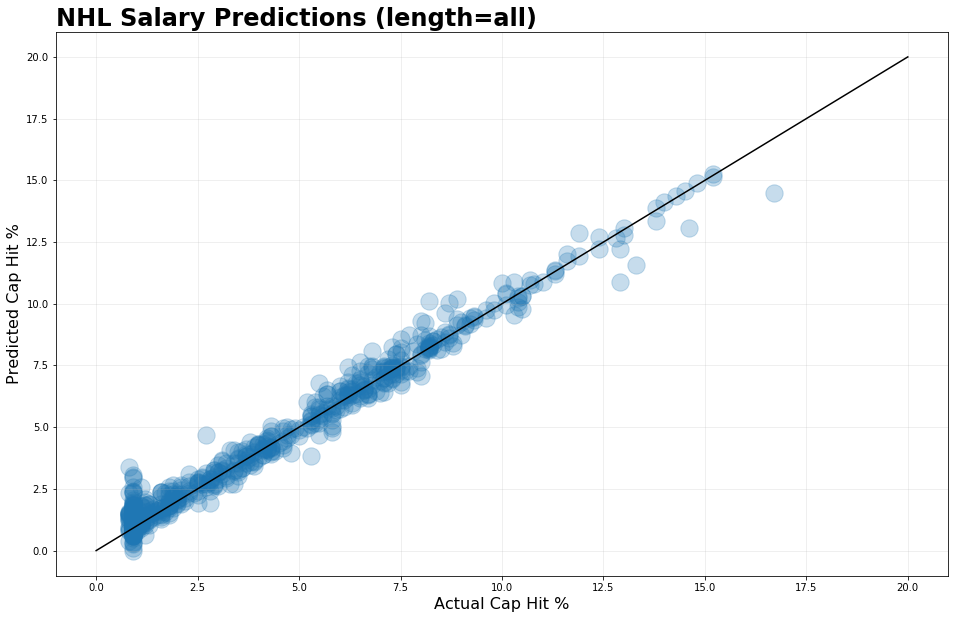

In [211]:
x = list(df['cap hit %'])
y = list(df['preds'])

def calplot(x, y, length):
    plt.figure(figsize=(16,10))

    plt.title(f'NHL Salary Predictions (length={length})', 
              fontsize=24, 
              loc='left', 
              family='sans-serif',
              weight='bold')

    plt.scatter(x,
                y,
                s=300,
                alpha=.25
    )

    plt.plot([0,20],[0,20], color='black')

    plt.xlabel('Actual Cap Hit %', fontsize=16)
    plt.ylabel('Predicted Cap Hit %', fontsize=16)

    plt.grid(alpha=.25)

    plt.savefig('salary_preds.png', dpi=400, bbox_inches='tight')

    plt.show()
    
calplot(x, y, length='all')

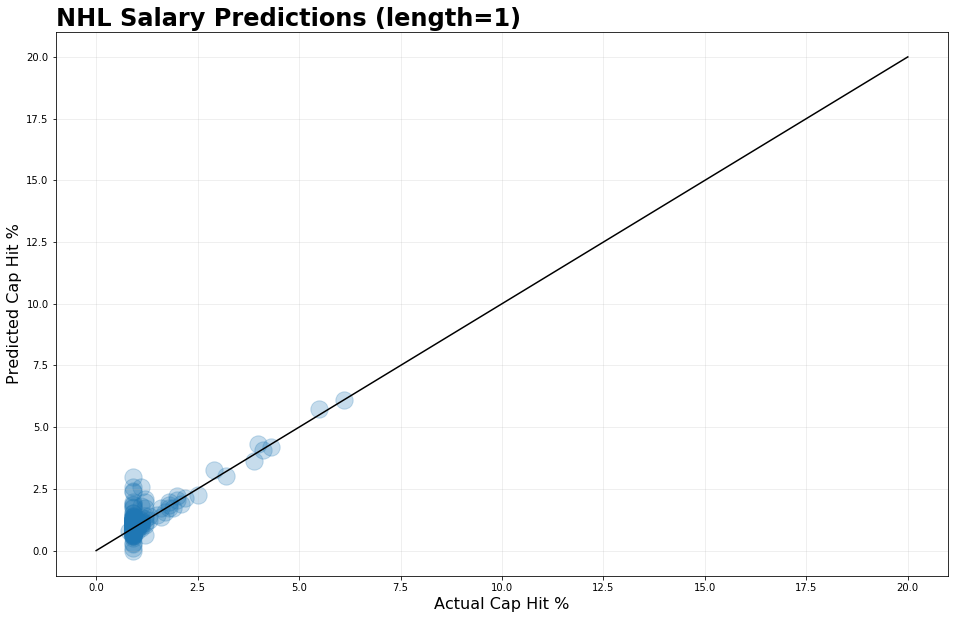

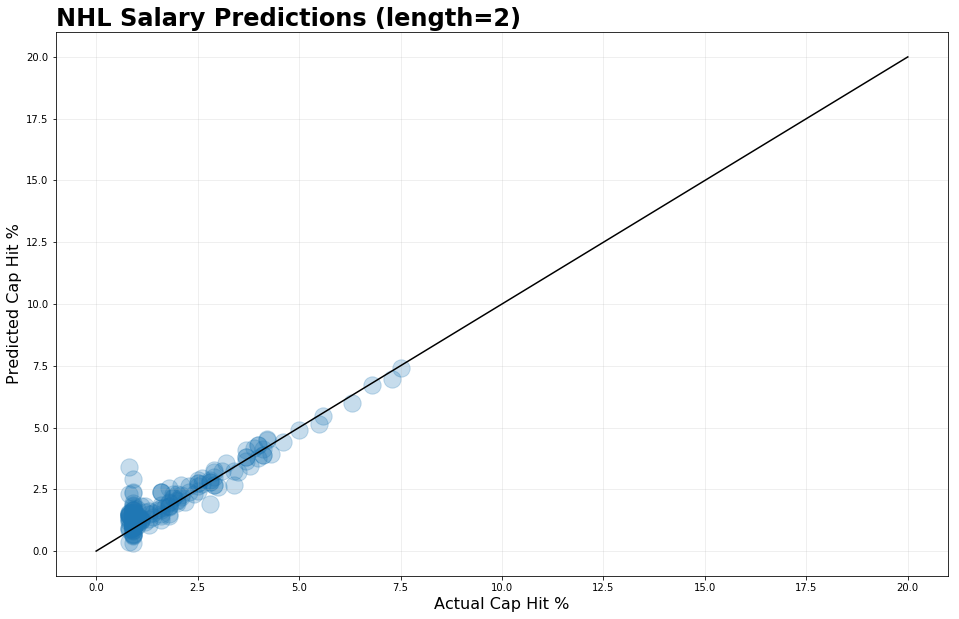

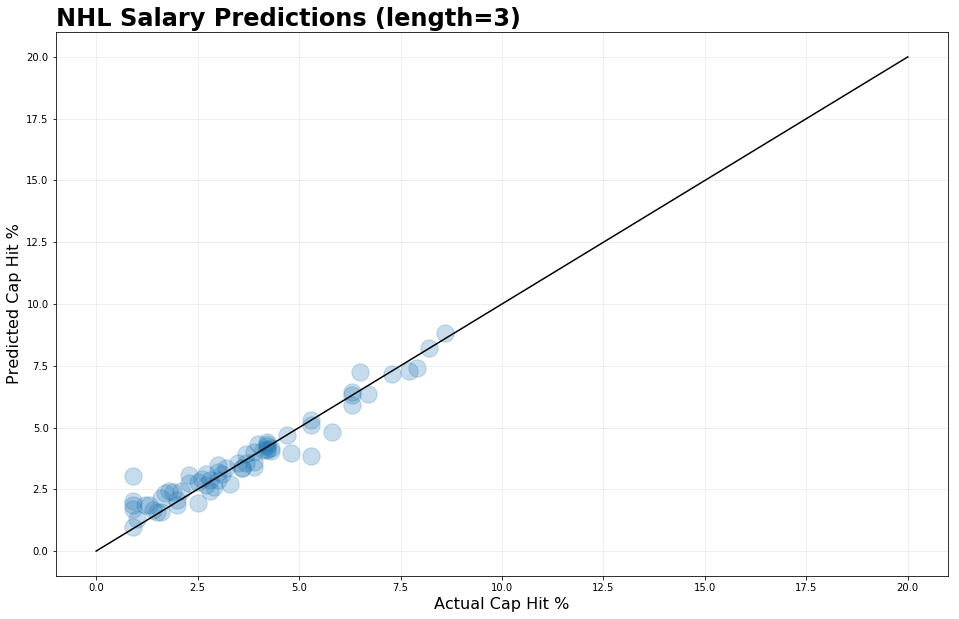

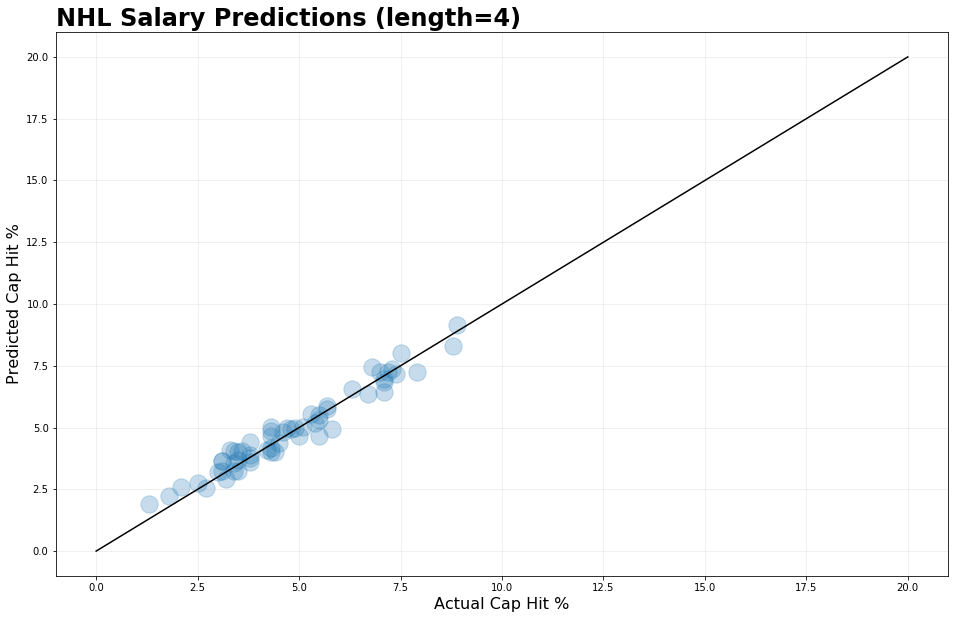

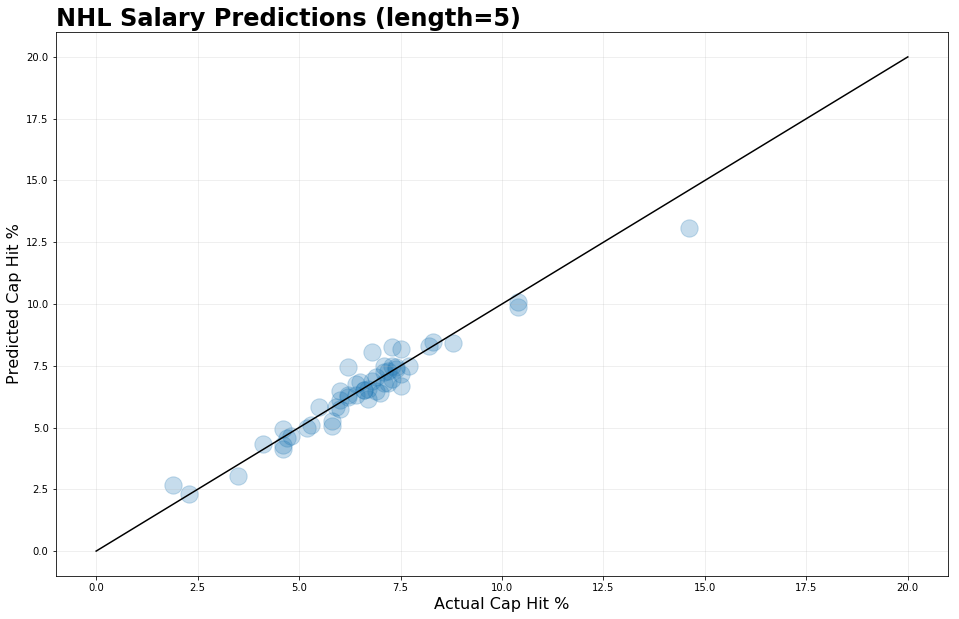

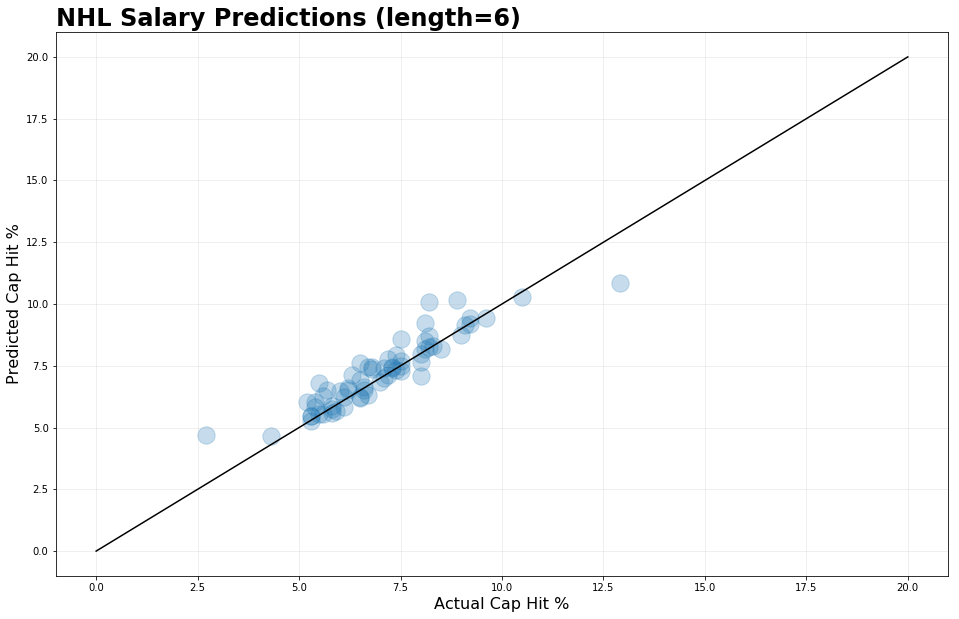

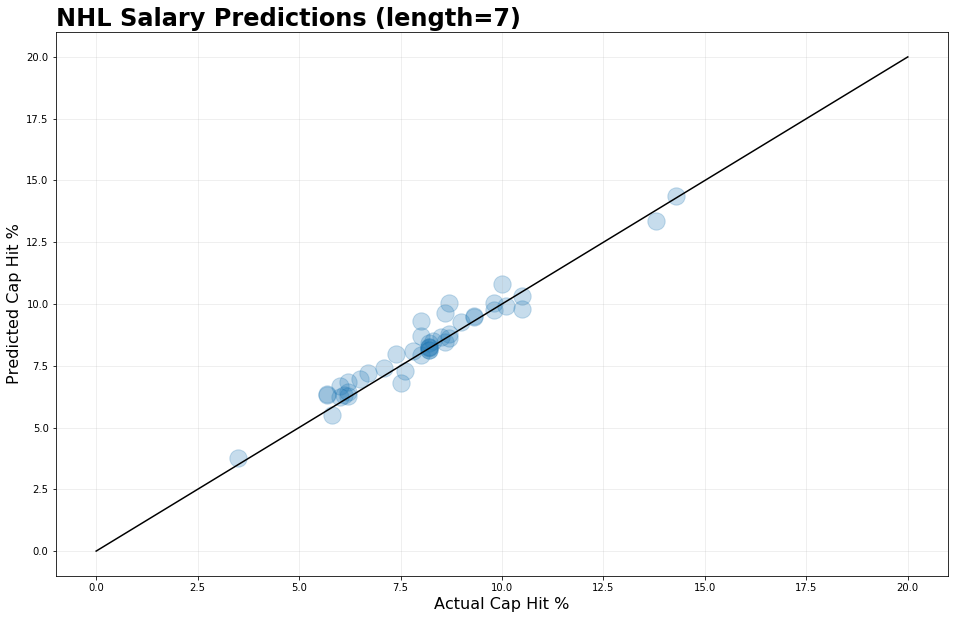

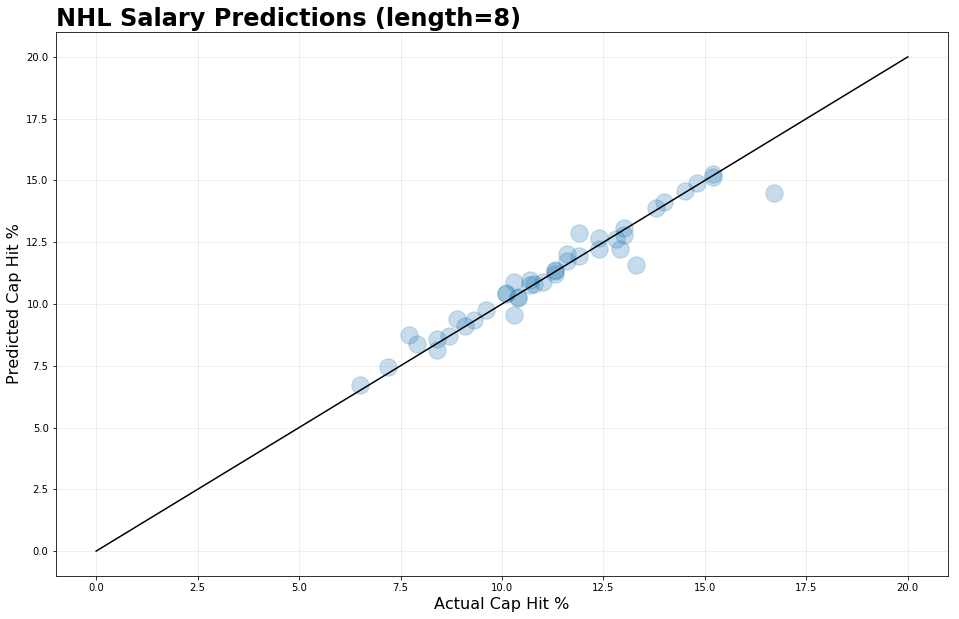

In [198]:
for i in range(1,9):
    x = df[df['length']==i]['cap hit %']
    y = df[df['length']==i]['preds']
    calplot(x, y, length=i)

In [199]:
df['dif'] = df['cap hit %'] - df['preds']

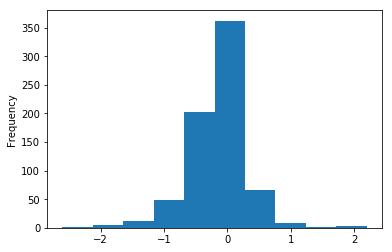

In [200]:
df['dif'].plot(kind='hist')

In [201]:
df[['player', 'dif']].sort_values('dif').head(10)

,player,dif
696,Kyle Burroughs,-2.601683
610,Samuel Morin,-2.157159
656,Luke Schenn,-2.074368
685,Yannick Weber,-2.036912
350,Calle Järnkrok,-1.999951
73,Filip Forsberg,-1.899216
606,Brian Pinho,-1.694266
703,Matt Lorito,-1.521262
609,Cory Conacher,-1.508406
701,Matt Irwin,-1.492646


In [202]:
df[['player', 'dif']].sort_values('dif', ascending=False).head(10)

,player,dif
0,Connor McDavid,2.200116
47,William Nylander,2.035965
9,Jack Eichel,1.729024
2,Auston Matthews,1.521550
226,Evgeni Dadonov,1.466188
196,Dmitry Kulikov,0.994579
121,Nick Foligno,0.908749
575,Brandon Davidson,0.904466
338,Brandon Manning,0.878866
195,Brendan Smith,0.850927


In [203]:
df[['player', 'preds']].sort_values('preds', ascending=False).head(10)

,player,preds
7,Patrick Kane,15.255339
6,Jonathan Toews,15.141456
13,Evgeni Malkin,14.882626
3,Erik Karlsson,14.558566
0,Connor McDavid,14.499884
1,Artemi Panarin,14.370511
8,Anze Kopitar,14.140361
5,Drew Doughty,13.870763
4,John Tavares,13.363876
2,Auston Matthews,13.078450


In [204]:
df[['player', 'preds']].sort_values('preds').head(10)

,player,preds
575,Brandon Davidson,-0.004466
619,Mark Letestu,0.112268
627,Jaycob Megna,0.280615
584,Anthony Bitetto,0.318648
648,Brian Lashoff,0.334715
694,Seth Helgeson,0.375939
579,Clark Bishop,0.513794
629,Carter Verhaeghe,0.601587
626,Cristoval Nieves,0.605675
642,Matt Bartkowski,0.606450


In [184]:
df['abs_dif'] = abs(df['cap hit %']-df['preds'])

In [206]:
df[['player', 'length', 'cap hit %', 'preds', 'abs_dif']].sort_values('abs_dif').head(30)

,player,length,cap hit %,preds,abs_dif
485,Ben Street,1,0.9,0.900050,0.000050
219,Erik Gudbranson,3,5.3,5.299346,0.000654
563,Alex Belzile,1,0.8,0.799007,0.000993
671,Tyler Graovac,1,0.9,0.898420,0.001580
562,Tyler Gaudet,1,0.9,0.902433,0.002433
284,Jean-Gabriel Pageau,3,4.1,4.097076,0.002924
654,Dakota Mermis,1,0.9,0.903335,0.003335
56,Paul Stastny,3,8.2,8.203796,0.003796
502,Nicholas Paul,1,0.9,0.904454,0.004454
333,Andrew Copp,2,2.8,2.804623,0.004623
